In [1]:
#1.Import libraries
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#2.Data Preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#training data location
train_generator = train_datagen.flow_from_directory(
        'D:/dataset/training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'D:/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [5]:
#Build the CNN model
#First we need to initilise the model

cnn = tf.keras.models.Sequential()

In [6]:
# Do convolution 

cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size =3,activation='relu',input_shape = [64,64,3] ))

In [7]:
#Pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [8]:
# Add 1 more layer

cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size =3,activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,strides = 2))

In [9]:
#Flatten

cnn.add(tf.keras.layers.Flatten())

In [10]:
#FULL connection 

cnn.add(tf.keras.layers.Dense(units = 128,activation ='relu'))

In [11]:
#Output layer

cnn.add(tf.keras.layers.Dense(units = 1,activation ='sigmoid'))

In [12]:
#Compile the model

cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [13]:
#Train the model


history = cnn.fit(x=train_generator,validation_data=validation_generator, epochs = 20)

Epoch 1/20
782/782 [==============================] - 341s 435ms/step - loss: 0.6341 - accuracy: 0.6356 - val_loss: 0.5797 - val_accuracy: 0.6904
Epoch 2/20
782/782 [==============================] - 151s 193ms/step - loss: 0.5440 - accuracy: 0.7232 - val_loss: 0.4838 - val_accuracy: 0.7630
Epoch 3/20
782/782 [==============================] - 144s 184ms/step - loss: 0.4970 - accuracy: 0.7595 - val_loss: 0.4598 - val_accuracy: 0.7794
Epoch 4/20
782/782 [==============================] - 151s 193ms/step - loss: 0.4658 - accuracy: 0.7781 - val_loss: 0.4218 - val_accuracy: 0.8053
Epoch 5/20
782/782 [==============================] - 145s 186ms/step - loss: 0.4434 - accuracy: 0.7924 - val_loss: 0.4649 - val_accuracy: 0.7831
Epoch 6/20
782/782 [==============================] - 144s 184ms/step - loss: 0.4279 - accuracy: 0.7995 - val_loss: 0.3849 - val_accuracy: 0.8272
Epoch 7/20
782/782 [==============================] - 146s 187ms/step - loss: 0.4160 - accuracy: 0.8090 - val_loss: 0.3652 -

In [14]:
#Make single prediction

import numpy as np
from keras.preprocessing import image
#test data location
test_image = image.load_img('D:/dataset/test1/prediction/predict3.jpg',target_size = (64,64) )
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1 : 
    prediction = 'dog'
else:
    prediction = 'cat'

In [15]:
prediction

'cat'

In [16]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


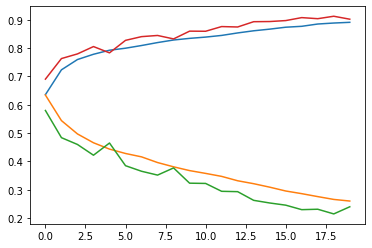

In [17]:
#Graph plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])